In [1]:
import numpy as np
import math

In [2]:
def making(myarray):
    if(myarray.shape[0]==4):
        pts = []
        pts.append([0,0])
        pts.append([0,0])
        temp = np.asarray(pts)
        temp[1,0] = myarray[0]
        temp[0,0] = myarray[1]
        temp[0,1] = myarray[2]
        temp[1,1] = myarray[3]
        return temp
    else:
        size = int(myarray.shape[0] / 4)
        #print(size)
        first = making(myarray[0:size])
        first = np.rot90(first)
        first = np.rot90(first)
        first = np.rot90(first)
        second = making(myarray[size : size*2])
        third = making(myarray[size*2 : 3*size])
        fourth = making(myarray[3*size : 4*size])
        fourth = np.rot90(fourth)
        
        
        upper = np.concatenate((second, third), axis=1)
        lower = np.concatenate((first, fourth), axis=1)
        lower = np.flip(lower, axis = 0)
        
        temp = np.concatenate((upper, lower), axis = 0)
        return temp

def demaking(myarray):
    if(myarray.shape[0]==2):
        pts = []
        pts.append(myarray[1,0])
        pts.append(myarray[0,0])
        pts.append(myarray[0,1])
        pts.append(myarray[1,1])
        return pts
    else:
        size = myarray.shape[0]
        first = myarray[size//2:, :size//2]
        second = myarray[:size//2, :size//2]
        third = myarray[:size//2, size//2:]
        fourth = myarray[size//2:, size//2:]
        
        first = np.flip(first, axis = 0)
        fourth = np.flip(fourth, axis = 0)
        
        first = np.rot90(first)
        fourth = np.rot90(fourth)
        fourth = np.rot90(fourth)
        fourth = np.rot90(fourth)
        
        pts = []
        pts.extend(demaking(first))
        pts.extend(demaking(second))
        pts.extend(demaking(third))
        pts.extend(demaking(fourth))
        
        return pts

In [3]:
pts = []

for i in range(16):
    pts.append(i)
    
pts = np.asarray(pts)
print(pts)
x = making(pts)

print(x)

y = np.asarray(demaking(x))

print(y)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[[ 5  6  9 10]
 [ 4  7  8 11]
 [ 3  2 13 12]
 [ 0  1 14 15]]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [3]:
import wave
import pylab

#This method is responsible for drawing the spectogram
def graph_spectrogram(wav_file):
    sound_info, frame_rate = get_wav_info(wav_file)
    pylab.figure(figsize=(19, 12))
    pylab.title('spectrogram of %r' % wav_file)
    pylab.specgram(sound_info, Fs=frame_rate)
    
#This method extracts, separates and returns the audio file's sampling rate and it's actual data
def get_wav_info(wav_file):
    wav = wave.open(wav_file, 'r')
    frames = wav.readframes(-1)
    sound_info = pylab.frombuffer(frames, 'int16')
    frame_rate = wav.getframerate()
    wav.close()
    return sound_info, frame_rate

In [4]:
import os

In [5]:
def makepicsfromwav():
    
    base_dir = "wavs"
    
    
    os.path.join(base_dir)
    files = os.listdir(base_dir)
    
    
    #pts2 = []
    ctr=0
    for k in files:
        pts = []
    
        wav = wave.open('wavs/{0}'.format(k), 'r')
        frames = wav.readframes(-1)
        sound_info = pylab.frombuffer(frames, 'int16')
        frame_rate = wav.getframerate()
        wav.close()

        #sound_info = sound_info.astype("float32")
        #sound_info /= (2**16-1)
        #return sound_info

        
        size = sound_info.shape[0]//(256*256)
        print(size)
        for i in range(size):
            pts.append(making(sound_info[i*256*256:(i+1)*256*256]))



        pts = np.asarray(pts)
        np.save('{0}'.format(ctr), pts)
        ctr+=1
        
    
    return pts

In [ ]:
pics = makepicsfromwav()

1306
359
262
420
1898
442
837


In [6]:
pics =np.concatenate((np.load('0.npy'), np.load('1.npy'), np.load('2.npy'), np.load('3.npy'), np.load('4.npy'), np.load('5.npy'), np.load('6.npy')))

In [7]:
print(pics.shape)

(5524, 256, 256)


In [8]:
print(np.count_nonzero(pics))

361619151


In [9]:
pics2 = pics.astype("float32")

In [10]:
print(np.count_nonzero(pics2))

361619151


In [11]:
print(pics2.min())

-32767.0


In [12]:
pics2 += 2**15

In [13]:
pics2 /= 2**16

In [14]:
print(pics2.max())

0.99998474


In [15]:
import matplotlib.pyplot as plt

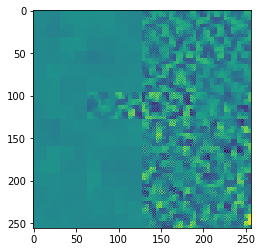

In [16]:
plt.imshow(pics2[1])

In [17]:
from keras.layers import  Input, Dense, Convolution2D, MaxPooling2D, UpSampling2D, Conv2DTranspose, AveragePooling2D
from keras.models import Model
from keras.optimizers import adam, SGD

Using TensorFlow backend.


In [19]:
input_img = Input(shape=(256,256,1))


x=Convolution2D(16, (4,4), activation = 'relu', padding ='same')(input_img)
x=MaxPooling2D((2,2), padding='same')(x)

x=Convolution2D(32, (4,4), activation = 'relu', padding ='same')(x)
x=MaxPooling2D((2,2), padding='same')(x)

x=Convolution2D(64, (4,4), activation = 'relu', padding ='same')(x)
encoded=MaxPooling2D((2,2), padding='same')(x)

encoder = Model(inputs = input_img, outputs = encoded)
encoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 16)      272       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 32)      8224      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        32832     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 64)        0   

In [20]:
x = Convolution2D(64, (4,4), activation='relu', padding='same')(encoded)
x = UpSampling2D((2,2))(x)
#x=Conv2DTranspose(1, (4,4), strides=(2,2), activation='relu', padding='same')(x)
x = Convolution2D(32, (4,4), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
#x=Conv2DTranspose(1, (4,4), strides=(2,2), activation='relu', padding='same')(x)
x = Convolution2D(16, (4,4), activation='relu', padding='same')(x) # 28x28-as kimenet
x = UpSampling2D((2,2))(x)
#x=Conv2DTranspose(1, (4,4), strides=(2,2), activation='relu', padding='same')(x)
decoded = Convolution2D(1, (3,3), activation='sigmoid', padding='same')(x)

In [87]:
ad = adam(lr=1)
autoencoder = Model(inputs = input_img, outputs = decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()#takotron2

ValueError: Output tensors to a Model must be the output of a Keras `Layer` (thus holding past layer metadata). Found: [[[[  1310]
   [  -876]
   [    55]
   ...
   [   297]
   [    -8]
   [  1028]]

  [[  -814]
   [   -29]
   [   345]
   ...
   [   -90]
   [  -568]
   [  -434]]

  [[   612]
   [    36]
   [  -523]
   ...
   [  -309]
   [   150]
   [  -375]]

  ...

  [[   283]
   [   241]
   [  -218]
   ...
   [  -283]
   [   480]
   [  -343]]

  [[ -1230]
   [  -207]
   [    10]
   ...
   [   267]
   [  -386]
   [   427]]

  [[  1492]
   [   497]
   [   356]
   ...
   [  -292]
   [   167]
   [  -712]]]


 [[[  1424]
   [  -674]
   [   281]
   ...
   [  1879]
   [  1062]
   [  2879]]

  [[  -743]
   [   173]
   [   573]
   ...
   [  1618]
   [   418]
   [   822]]

  [[   816]
   [   221]
   [  -252]
   ...
   [  1195]
   [  1492]
   [   775]]

  ...

  [[   322]
   [   276]
   [  -195]
   ...
   [  -473]
   [   872]
   [  -300]]

  [[ -1168]
   [  -165]
   [    44]
   ...
   [   336]
   [ -1205]
   [   179]]

  [[  1469]
   [   534]
   [   374]
   ...
   [  -538]
   [  -407]
   [ -1448]]]


 [[[  3011]
   [ -2611]
   [   350]
   ...
   [  2462]
   [  -640]
   [  4248]]

  [[ -2764]
   [  -673]
   [   164]
   ...
   [   669]
   [   575]
   [   802]]

  [[   833]
   [  -695]
   [ -1128]
   ...
   [   713]
   [   749]
   [   900]]

  ...

  [[    99]
   [   207]
   [ -1328]
   ...
   [ -1695]
   [  -864]
   [ -1911]]

  [[ -1182]
   [  -487]
   [  -917]
   ...
   [ -1011]
   [  -561]
   [  -125]]

  [[  1403]
   [  1076]
   [ -1193]
   ...
   [ -1536]
   [   -83]
   [ -1724]]]


 ...


 [[[ 10001]
   [ -4596]
   [   199]
   ...
   [ -8511]
   [-11476]
   [ -8002]]

  [[ -4754]
   [ -2637]
   [  1452]
   ...
   [ -8455]
   [-12573]
   [ -9861]]

  [[  1014]
   [   833]
   [ -2733]
   ...
   [-11853]
   [-10375]
   [-12844]]

  ...

  [[ -3496]
   [ -1322]
   [ -7951]
   ...
   [ -5278]
   [ -3316]
   [ -5184]]

  [[ -6910]
   [ -5186]
   [ -3498]
   ...
   [ -3100]
   [ -5858]
   [ -2791]]

  [[  -191]
   [   699]
   [ -5549]
   ...
   [ -4703]
   [ -3811]
   [ -5874]]]


 [[[ 14031]
   [  2267]
   [ 12932]
   ...
   [  2459]
   [ -3050]
   [  1398]]

  [[ -4816]
   [  8441]
   [ 11937]
   ...
   [  1318]
   [ -1292]
   [ -2234]]

  [[  9197]
   [  5872]
   [  9437]
   ...
   [  1981]
   [  -916]
   [ -1891]]

  ...

  [[ -2869]
   [ -4343]
   [ -6879]
   ...
   [  3526]
   [  5480]
   [  3607]]

  [[ -8243]
   [ -5655]
   [ -6604]
   ...
   [  5495]
   [  4046]
   [  5600]]

  [[ -3348]
   [ -3016]
   [ -6788]
   ...
   [  4160]
   [  5145]
   [  3610]]]


 [[[  5173]
   [-10098]
   [ -2778]
   ...
   [  3842]
   [  1786]
   [  4626]]

  [[ -9436]
   [ -5178]
   [ -4286]
   ...
   [  3237]
   [  1464]
   [  1448]]

  [[ -3606]
   [ -5533]
   [ -7542]
   ...
   [  2366]
   [  2676]
   [  1458]]

  ...

  [[  8395]
   [  5602]
   [  5583]
   ...
   [  -637]
   [   231]
   [  -590]]

  [[  -614]
   [  6330]
   [  4066]
   ...
   [   222]
   [  -308]
   [   491]]

  [[ 11554]
   [  5484]
   [  5561]
   ...
   [  -510]
   [   308]
   [  -959]]]]

In [18]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
patience=100
early_stopping= EarlyStopping(patience=patience, verbose=1) #Using early stopping with patience = 10
checkpointer=ModelCheckpoint(filepath="best2.hdf5",save_best_only=True, verbose=1) #Saving the best state of the network

In [47]:
pics2 = pics2.reshape(5524,256,256,1)
autoencoder.fit(pics2[:5000], pics2[:5000],
                epochs = 200,
                batch_size=128,
                shuffle=True,
                validation_data=(pics2[5000:],pics2[5000:]),
                callbacks=[checkpointer,early_stopping])

Train on 5000 samples, validate on 524 samples
Epoch 1/200
5000/5000 [==============================] - 24s 5ms/step - loss: 4.0624e-04 - val_loss: 3.7822e-04

Epoch 00001: val_loss improved from inf to 0.00038, saving model to best2.hdf5
Epoch 2/200
5000/5000 [==============================] - 22s 4ms/step - loss: 4.0737e-04 - val_loss: 3.7884e-04

Epoch 00002: val_loss did not improve from 0.00038
Epoch 3/200
5000/5000 [==============================] - 22s 4ms/step - loss: 4.0677e-04 - val_loss: 3.8219e-04

Epoch 00003: val_loss did not improve from 0.00038
Epoch 4/200
5000/5000 [==============================] - 22s 4ms/step - loss: 4.0580e-04 - val_loss: 3.7749e-04

Epoch 00004: val_loss improved from 0.00038 to 0.00038, saving model to best2.hdf5
Epoch 5/200
5000/5000 [==============================] - 22s 4ms/step - loss: 4.1482e-04 - val_loss: 3.9693e-04

Epoch 00005: val_loss did not improve from 0.00038
Epoch 6/200
5000/5000 [==============================] - 22s 4ms/step - l

In [49]:
encoded_imgs = encoder.predict(pics2)
decoded_img = autoencoder.predict(pics2)
print(decoded_img.shape)

(5524, 256, 256, 1)


In [50]:
print(decoded_img[0])

[[[0.52000386]
  [0.4866302 ]
  [0.50085205]
  ...
  [0.5045457 ]
  [0.49986568]
  [0.51569885]]

 [[0.48757404]
  [0.49954802]
  [0.5052652 ]
  ...
  [0.49862328]
  [0.4913328 ]
  [0.49337277]]

 [[0.5093532 ]
  [0.5005529 ]
  [0.49201676]
  ...
  [0.49527255]
  [0.50230265]
  [0.49427384]]

 ...

 [[0.50432706]
  [0.50369185]
  [0.4966682 ]
  ...
  [0.49567893]
  [0.5073371 ]
  [0.49476036]]

 [[0.4812251 ]
  [0.49683943]
  [0.50015795]
  ...
  [0.5040853 ]
  [0.49410057]
  [0.50652194]]

 [[0.5227778 ]
  [0.5075848 ]
  [0.5054361 ]
  ...
  [0.49554342]
  [0.50256026]
  [0.48912227]]]


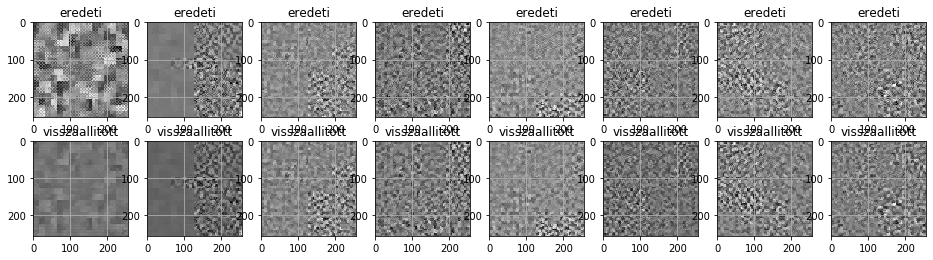

In [51]:
n = 8

plt.figure(figsize=(16,4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    ax.set_title('eredeti')
    plt.imshow(pics2[i].reshape(256,256))
    plt.gray()
    ax.grid('False')
    
    ax = plt.subplot(2, n, i+1+n)
    ax.set_title('visszaallitott')
    plt.imshow(decoded_img[i].reshape(256,256))
    plt.gray()
    ax.grid('False')

In [52]:
print(decoded_img[4])

[[[0.56286216]
  [0.4970593 ]
  [0.5314304 ]
  ...
  [0.5318132 ]
  [0.49501237]
  [0.5444841 ]]

 [[0.48503402]
  [0.5174518 ]
  [0.5298988 ]
  ...
  [0.5016411 ]
  [0.49538484]
  [0.49367973]]

 [[0.5371269 ]
  [0.51845187]
  [0.5094416 ]
  ...
  [0.49566796]
  [0.5064243 ]
  [0.5035129 ]]

 ...

 [[0.46775746]
  [0.4531993 ]
  [0.4362538 ]
  ...
  [0.5621966 ]
  [0.60161644]
  [0.5844514 ]]

 [[0.41085866]
  [0.44687724]
  [0.43664783]
  ...
  [0.606373  ]
  [0.58153456]
  [0.59714127]]

 [[0.47362277]
  [0.46944284]
  [0.44129726]
  ...
  [0.5615466 ]
  [0.5773311 ]
  [0.547486  ]]]


In [53]:
np.save('decoded5', decoded_img)

In [54]:
decoded = np.load('decoded5.npy')

In [55]:
decoded.shape

(5524, 256, 256, 1)

In [56]:
decoded *= 2**16

In [57]:
decoded -= 2**15

In [58]:
decoded = decoded.astype('int16')

In [59]:
music = wave.open('music_restored5', 'w')

In [60]:
music.setframerate(44100)

In [61]:
dataformusic = []
for i in range(1306):
    dataformusic.extend(demaking(decoded[i]))

In [62]:
dataformusic = np.asarray(dataformusic)

In [63]:
dataformusic.shape

(85590016, 1)

In [64]:
music.setnchannels(2)

In [65]:
music.setsampwidth(2)

In [66]:
music.writeframes(dataformusic)

In [67]:
music.close()

In [41]:
autoencoder.save('best.hdf5')

In [19]:
from keras.models import load_model
autoencoder = load_model('best2sgd.hdf5')

In [20]:
autoencoder.compile(optimizer='sgd', loss='mse')

In [21]:
patience=100
early_stopping= EarlyStopping(patience=patience, verbose=1) #Using early stopping with patience = 10
checkpointer=ModelCheckpoint(filepath="best2sgd.hdf5",save_best_only=True, verbose=1) #Saving the best state of the network

In [26]:
pics2 = pics2.reshape(5524,256,256,1)
autoencoder.fit(pics2[:5000], pics2[:5000],
                epochs = 200,
                batch_size=128,
                shuffle=True,
                validation_data=(pics2[5000:],pics2[5000:]),
                callbacks=[checkpointer,early_stopping])

Train on 5000 samples, validate on 524 samples
Epoch 1/200
5000/5000 [==============================] - 23s 5ms/step - loss: 2.4600e-04 - val_loss: 2.5322e-04

Epoch 00001: val_loss did not improve from 0.00025
Epoch 2/200
5000/5000 [==============================] - 22s 4ms/step - loss: 2.4599e-04 - val_loss: 2.5322e-04

Epoch 00002: val_loss improved from 0.00025 to 0.00025, saving model to best2sgd.hdf5
Epoch 3/200
5000/5000 [==============================] - 22s 4ms/step - loss: 2.4599e-04 - val_loss: 2.5322e-04

Epoch 00003: val_loss improved from 0.00025 to 0.00025, saving model to best2sgd.hdf5
Epoch 4/200
5000/5000 [==============================] - 22s 4ms/step - loss: 2.4599e-04 - val_loss: 2.5322e-04

Epoch 00004: val_loss did not improve from 0.00025
Epoch 5/200
5000/5000 [==============================] - 23s 5ms/step - loss: 2.4599e-04 - val_loss: 2.5329e-04

Epoch 00005: val_loss did not improve from 0.00025
Epoch 6/200
5000/5000 [==============================] - 22s 4m

In [68]:
jazz = wave.open('Double Violin Concerto 1st Movement - J.S. Bach.wav', 'r')

In [69]:
jazz.getframerate()

44100

In [70]:
jazz.getnchannels()

2

In [71]:
jazz.getsampwidth()

2

In [72]:
pts = []

frames = jazz.readframes(-1)
sound_info = pylab.frombuffer(frames, 'int16')
frame_rate = jazz.getframerate()
jazz.close()

#sound_info = sound_info.astype("float32")
#sound_info /= (2**16-1)
#return sound_info


size = sound_info.shape[0]//(256*256)
print(size)
for i in range(size):
    pts.append(making(sound_info[i*256*256:(i+1)*256*256]))



pts = np.asarray(pts)

345


In [73]:
sound_info.shape

(22621992,)

In [74]:
pts.shape

(345, 256, 256)

In [75]:
pts = pts.astype('float32')
pts += 2**15
pts /= 2**16

In [76]:
pts = pts.reshape(345,256,256,1)
decoded_img = autoencoder.predict(pts)
print(decoded_img.shape)

(345, 256, 256, 1)


In [77]:
decoded_img *= 2**16
decoded_img -= 2**15

In [78]:
decoded_img = decoded_img.astype('int16')

In [79]:
dataformusic = []
for i in range(345):
    dataformusic.extend(demaking(decoded_img[i]))

In [80]:
dataformusic = np.asarray(dataformusic)

In [81]:
music = wave.open('guitar_restored5', 'w')

In [82]:
music.setframerate(44100)
music.setnchannels(2)
music.setsampwidth(2)
music.writeframes(dataformusic)
music.close()

In [83]:
jazz.close()